# Signal Processing using Fourier Transform

Fourier Transform is a mathematical technique that transforms a signal from the time domain to the frequency domain. It is widely used in signal processing, image processing, and many other fields. In this example, we will generate a signal composed of multiple sine waves, apply Fourier Transform to analyze its frequency components, and perform filtering to remove high-frequency noise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [2]:
# Generate a signal composed of multiple sine waves
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector (1 second)
freqs = [5, 50, 150]  # Frequencies of the signal components
signal = np.sum([np.sin(2 * np.pi * f * t) for f in freqs], axis=0)  # Sum of sine waves

In [3]:

# Perform Fourier Transform (using matrix multiplication)
N = len(signal)
fourier_matrix = np.exp(-2j * np.pi * np.outer(np.arange(N), np.arange(N)) / N)  # DFT matrix
transformed_signal = np.dot(fourier_matrix, signal)  # Apply DFT

# Apply filtering: Remove high-frequency noise (keep components < 60 Hz)
filtered_transformed_signal = transformed_signal.copy()
filtered_transformed_signal[60:] = 0  # Zero out higher frequencies

# Perform inverse Fourier Transform to reconstruct the signal
inverse_fourier_matrix = np.exp(2j * np.pi * np.outer(np.arange(N), np.arange(N)) / N)  # IDFT matrix
reconstructed_signal = np.dot(inverse_fourier_matrix, filtered_transformed_signal) / N

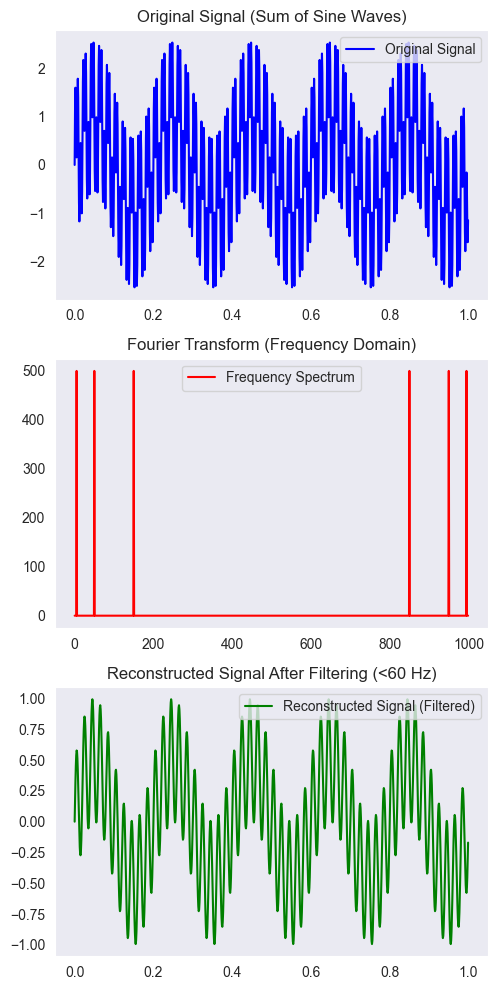

In [7]:
# Plot original and filtered signals
fig, ax = plt.subplots(3, 1, figsize=(5, 10))

ax[0].plot(t, signal, label="Original Signal", color="blue")
ax[0].set_title("Original Signal (Sum of Sine Waves)")
ax[0].legend()
ax[0].grid()

ax[1].plot(np.abs(transformed_signal), label="Frequency Spectrum", color="red")
ax[1].set_title("Fourier Transform (Frequency Domain)")
ax[1].legend()
ax[1].grid()

ax[2].plot(t, reconstructed_signal.real, label="Reconstructed Signal (Filtered)", color="green")
ax[2].set_title("Reconstructed Signal After Filtering (<60 Hz)")
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.show()